<a href="https://colab.research.google.com/github/Humam-PS/Deep-Learning/blob/main/Image_classification_using_CNN_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Python Modules or Files from Drive into Colab

## 1) Mount your google drive in google colab

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) We'll need to update our path to import from Drive.

In [64]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

## 3) Now, we can be able to import our modules or files stuff from drive

In [65]:
### To import using the following code lines, *.py files should be in drive ###
# from myplts import plt_bar, plt_img

In [66]:
### You can import *.ipynb files directly ### - Here, install library

# Method_01
!pip install kora -q
from kora import drive
drive.link_nbs()

from myplts import plt_bar, plt_img

# Method_02
#!cp -r "/content/drive/MyDrive/Colab Notebooks/myplts.ipynb" '/content/'

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
importing Jupyter notebook from /nbs/myplts.ipynb


# Main Code

## IMPORT MODULES

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# print version of tensorflow framework
print(tf.__version__)

2.4.1


## LOADING CIFAR10 DATASET

In [18]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Create a classes list: Used later for visualizing purpose
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Check the shape of dataset

In [16]:
# 50000 images are encoded as Numpy arrays, each sample is 32x32 pixels and 3 is for RGB channels
print('training dataset: ', 'images:', train_images.shape, 'labels', train_labels.shape)

# 10000 images are encoded as Numpy arrays, each sample is 32x32 pixels and 3 is for RGB channels
print('test dataset:     ', 'images:', test_images.shape, 'labels', test_labels.shape)

training dataset:  images: (50000, 32, 32, 3) labels (50000, 1)
test dataset:      images: (10000, 32, 32, 3) labels (10000, 1)


In [37]:
# Let’s look at the training data (labels = expected output)
    # train_labels: 2D array of digits, ranging from 0 to 9. [10 classes]
    # The images and labels have a one-to-one correspondence.
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## VISUALIZE TRAINING & TEST SETS

### VISULAIZE ONE SAMPLE

In [19]:
# Go to the next cell to call this function
def plt_sample(images, labels, idx):
  # reshape the labels array from 2D array to one vector
  labels = labels.reshape(-1,)
  
  plt.figure(figsize=(3,3))
  plt.imshow(images[idx])
  plt.title(classes[labels[idx]])
  plt.colorbar()                    # pixel intensity [0-255]
  plt.show()

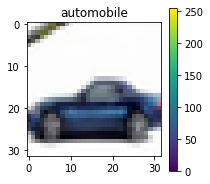

In [11]:
plt_sample(test_images, test_labels, 105)

### VISUALIZE THE FIRST 25 SAMPLES

In [21]:
# Go to the next cell to call this function
def plt_samples(images, labels):
  # reshape the labels array from 2D array to one vector
  labels = labels.reshape(-1,)

  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap = plt.cm.binary)
      plt.title(classes[labels[i]])
  plt.show()

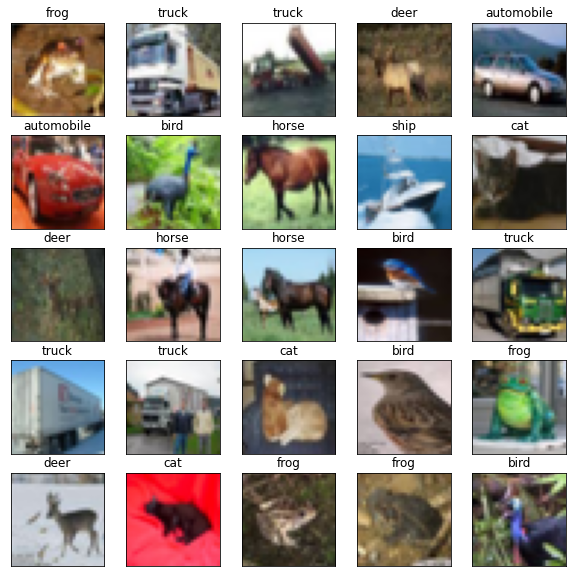

In [22]:
plt_samples(train_images, train_labels)

## PREPROCESS DATASET: Scale images

### PREPAIRING THE IMAGE DATA

In [23]:
# Normalize the values. (scale values to be in the [0, 1] interval)
train_images = train_images / 255
test_images  = test_images / 255

In [ ]:
# Check the new shape
print(train_images.shape)
train_images[0]

In [ ]:
#2 PREPARING THE LABELS ********* we need to categorically encode the labels

#to_categorical = keras.utils.to_categorical

#train_labels = to_categorical(train_labels)
#test_labels  = to_categorical(test_labels)


## CNN NETWORK ARCHITECTURE

### BUILD THE MODEL

Define CNN neural_network (define the keras model), it's not optimal, It has to be optimized.

Output Layer - Dense fully connected layer of 10 nodes (softmax)
               returns an array of 10 probability scores (summing to 1)

In [32]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPool2D, Dropout, Flatten, Dense

cnn = Sequential([
    # cnn
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPool2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPool2D((2,2)),

    # dense
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### COMPILE AND OPTIMIZE THE MODEL

we need to pick three more things, as part of the compilation step:
    # 1- loss function - Measures the quality of the Network's output on the training data.
    # 2- Optimizer     - mechanism to update the values of the weights of the network.
    # 3- Metrics       - monitors the training to determine when stop

In [33]:
cnn.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

## TRAINING THE NEURON MODEL

* Train the neural network: fit the neuron model to the training data

* We are going to train the models in 5 epochs (that is a complete presentation of the trainging dataset)
* This means that we would feed the 50,000 images and labels into the network 5 different times
* No. of epochs = No. of training loops.
* In each epoch, the accuracy is increased
* For each epoch we would see both the loss and the accuracy of the model.
* Model is being trained on 128 batches of 391 images each. (128 batches * 391 images = 50,000 images)

In [34]:
cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6653 - accuracy: 0.3951
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0783 - accuracy: 0.6257
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9155 - accuracy: 0.6785
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8290 - accuracy: 0.7105
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7540 - accuracy: 0.7360
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6855 - accuracy: 0.7600
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6276 - accuracy: 0.7810
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5776 - accuracy: 0.7992
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5222 - accuracy: 0.8171
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

## EVALUATE THE NEURON MODEL (TEST)

In [42]:
test_loss, test_acc, = cnn.evaluate(test_images, test_labels)

print('Test loss: ', test_loss)
print('Test accu: ', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.9868 - accuracy: 0.6968
Test loss:  0.9868171811103821
Test accu:  0.6967999935150146


## MAKE PREDICTION

In [43]:
# Predict the class of each image, since we have an optimized model now.
predictions = cnn.predict(test_images)

# Each prediction for each image has 10 probability scores.
predictions.shape

(10000, 10)

## VISUALIZE AND CHECK THE RESULTS

### LOAD ORIGINAL DATASET

* we need to reload the original TEST dataset to use it with plot function

In [44]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

### RESHAPE THE TEST LABELS

* reshape the TEST labels array from 2D array to one vector

In [55]:
test_labels = test_labels.reshape(-1,)
#train_labels = train_labels.reshape(-1,)

### CHECK RESULTS FOR ONE SAMPLE

* Each prediction is an array of 10 numbers (# of classes). Each number represents the confidence that the image corresponds to the each of 10 different classes.

[1.1160494e-04 5.2835690e-06 1.5080844e-03 8.2825432e-03 1.1037349e-02
 7.1161962e-04 8.7348884e-01 3.6383183e-06 1.0484863e-01 2.3824114e-06]

this sample is predicted as a:  frog 



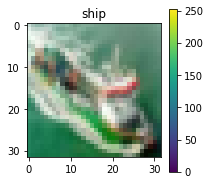

In [61]:
sample = 15
print(predictions[sample])

# pick the index of the element with high confidence
maxProb = np.argmax(predictions[sample])
print('\nthis sample is predicted as a: ', classes[maxProb], '\n')


# plot the sample
plt.figure(figsize=(3,3))
plt.imshow(test_images[sample]) # cmap=plt.cm.binary
plt.title(classes[test_labels[sample]])
plt.colorbar()
plt.show()

### VISUALIZE THE PREDICTION RESULT 01

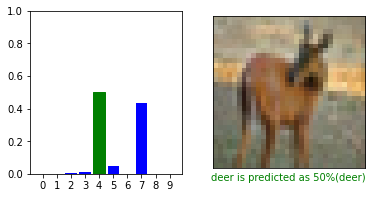

In [70]:
sample = 36
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt_bar(predictions[sample], test_labels[sample])
plt.subplot(1,2,2)
plt_img(predictions[sample], test_labels[sample], test_images[sample], class_names=classes)
plt.show()

### VISUALIZE THE PREDICTION RESULT 02

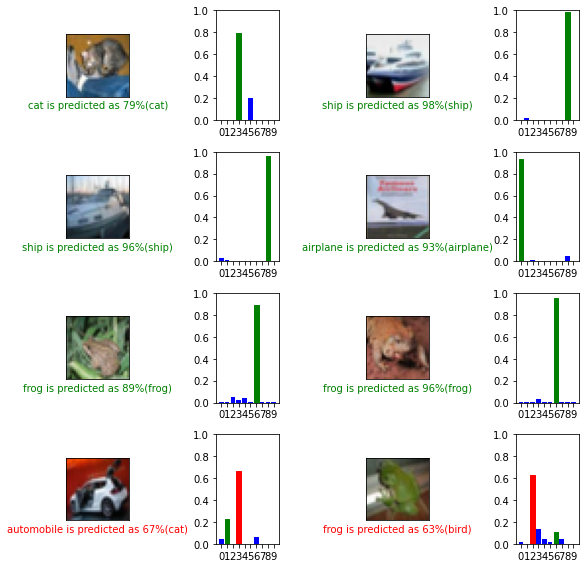

In [72]:
rows = 4
cols = 2

num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
    plt.subplot(rows,2*cols, 2*i+1)
    plt_img(predictions[i], test_labels[i], test_images[i], class_names=classes)
    plt.subplot(rows,2*cols, 2*i+2)
    plt_bar(predictions[i], test_labels[i])
    
plt.tight_layout()
plt.show()